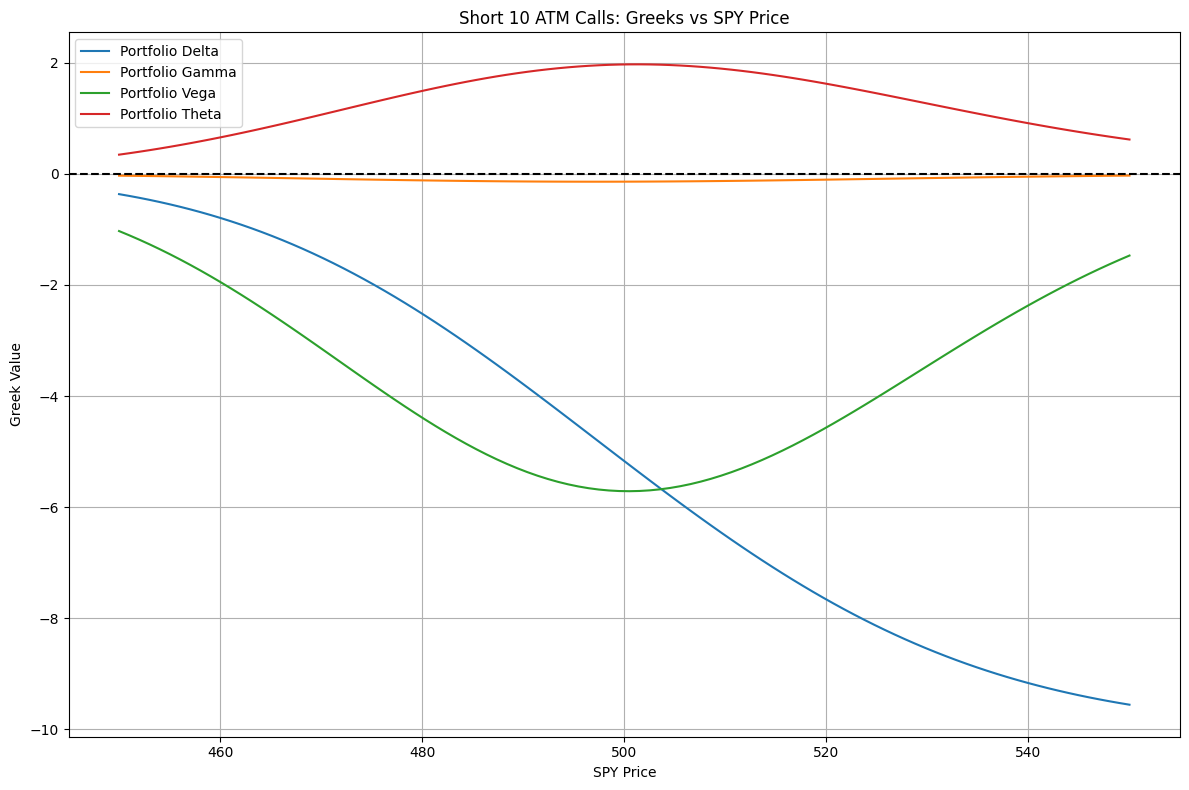

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes Greeks
def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

def call_delta(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    return norm.cdf(d1)

def call_gamma(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

def call_vega(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T) / 100

def call_theta(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    term1 = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))
    term2 = r * K * np.exp(-r*T) * norm.cdf(d2)
    return (term1 - term2) / 365

# Portfolio parameters
K = 500
T = 30 / 365
r = 0.01
sigma = 0.2
short_calls = 10

# Price range
prices = np.linspace(450, 550, 100)
deltas, gammas, vegas, thetas = [], [], [], []

# Compute portfolio Greeks
for S in prices:
    deltas.append(-short_calls * call_delta(S, K, T, r, sigma))
    gammas.append(-short_calls * call_gamma(S, K, T, r, sigma))
    vegas.append(-short_calls * call_vega(S, K, T, r, sigma))
    thetas.append(-short_calls * call_theta(S, K, T, r, sigma))

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(prices, deltas, label='Portfolio Delta')
plt.plot(prices, gammas, label='Portfolio Gamma')
plt.plot(prices, vegas, label='Portfolio Vega')
plt.plot(prices, thetas, label='Portfolio Theta')
plt.axhline(0, color='black', linestyle='--')
plt.title('Short 10 ATM Calls: Greeks vs SPY Price')
plt.xlabel('SPY Price')
plt.ylabel('Greek Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()